In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
(x_train, y_train),(x_test, y_test)=mnist.load_data()
print("Train data shape:",x_train.shape)
print("Test data shape:",x_test.shape)

Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [3]:
x_train=x_train/255.0
x_test=x_test/255.0

In [4]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [5]:
model=Sequential ([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.1,verbose=1)

Epoch 1/10
422/422 [==============================] - 3s 4ms/step - loss: 0.3519 - accuracy: 0.9002 - val_loss: 0.1507 - val_accuracy: 0.9575
Epoch 2/10
422/422 [==============================] - 1s 3ms/step - loss: 0.1451 - accuracy: 0.9569 - val_loss: 0.1068 - val_accuracy: 0.9682
Epoch 3/10
422/422 [==============================] - 1s 3ms/step - loss: 0.1015 - accuracy: 0.9690 - val_loss: 0.0890 - val_accuracy: 0.9743
Epoch 4/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0765 - accuracy: 0.9768 - val_loss: 0.0824 - val_accuracy: 0.9748
Epoch 5/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0596 - accuracy: 0.9821 - val_loss: 0.0838 - val_accuracy: 0.9758
Epoch 6/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0485 - accuracy: 0.9854 - val_loss: 0.0765 - val_accuracy: 0.9782
Epoch 7/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0380 - accuracy: 0.9881 - val_loss: 0.0815 - val_accuracy: 0.9758
Epoch 

In [8]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=0)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")


 Test Accuracy: 97.62%


In [9]:
predictions=model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


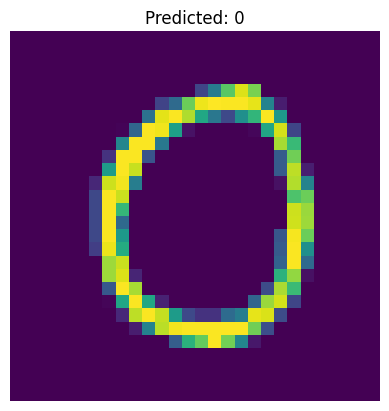

In [10]:
idx=random.randint(0,len(x_test)-1)
plt.imshow(x_test[idx])
plt.title(f"Predicted: {np.argmax(predictions[idx])}")
plt.axis('off')
plt.show()

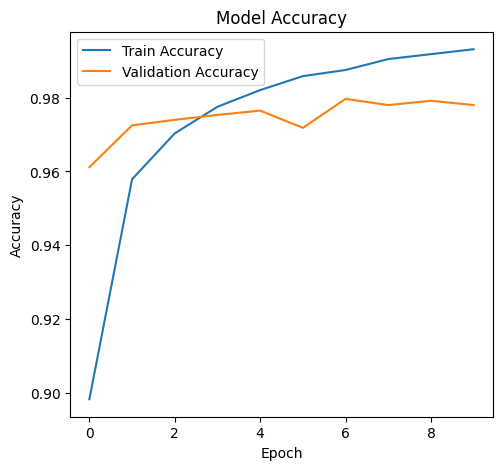

In [40]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


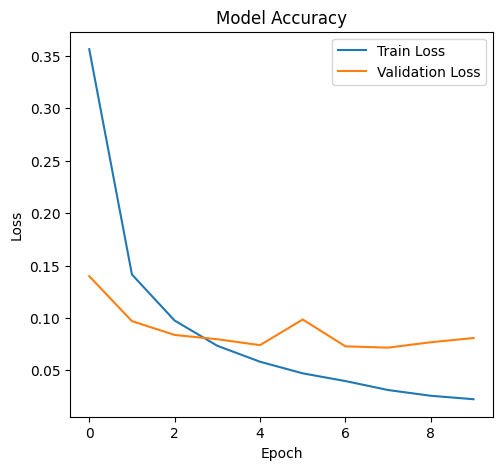

In [41]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
